In [5]:
# Data Wrangling
import numpy as np
import pandas as pd

#Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

#Data Cleaning
import neattext.functions as nfx

# Machine-learning Algorithm 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB


from sklearn.feature_extraction.text import CountVectorizer #Countvectorizer
from sklearn.model_selection import train_test_split        #train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix #Evaluation


In [2]:
!pip install neattext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 458.8 kB/s eta 0:00:000:00:010:00:01

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [14]:
df=pd.read_csv('../data/Emotion_Detection.csv',index_col=False)
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [18]:
df.drop(df.columns[0],inplace=True,axis=1)

In [19]:
df.head()

,Emotion,Text,Clean_Text
0,neutral,Why ?,NaN
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [35]:
for i in range(0,15):
    print(df['Text'][i],end='---'*5)
    

 Why ? ---------------Sage Act upgrade on my to do list for tommorow.---------------ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN I HATE FUNERALS THIS REALLY SHOWS ME HOW BLESSED I AM --------------- Such an eye ! The true hazel eye-and so brilliant ! Regular features , open countenance , with a complexion , Oh ! What a bloom of full health , and such a pretty height and size ; such a firm and upright figure ! There is health , not merely in her bloom , but in her air , her head , her glance . One hears sometimes of a child being ' the picture of health ' ; now , she always gives me the idea of being the complete picture of grown-up health . She is loveliness itself . ---------------@Iluvmiasantos ugh babe.. hugggzzz for u .!  babe naamazed nga ako e babe e, despite nega's mas pinaramdam at fil ko ang ---------------I'm expecting an extremely important phonecall any minute now #terror #opportunity--------------- .Couldnt wait to see them live. If missing them in NH7 wasnt painful enuf,

In [36]:
df.Emotion.value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Emotion     34792 non-null  object
 1   Text        34792 non-null  object
 2   Clean_Text  34326 non-null  object
dtypes: object(3)
memory usage: 815.6+ KB


In [67]:
df['Clean_Text'].isnull().sum()

466

In [82]:
df['Clean_Text'].fillna("IGNORE TEXT",inplace=True)

In [84]:
df['Clean_Text'].isnull().sum()

0

In [69]:
df['Emotion'].isnull().sum()

0

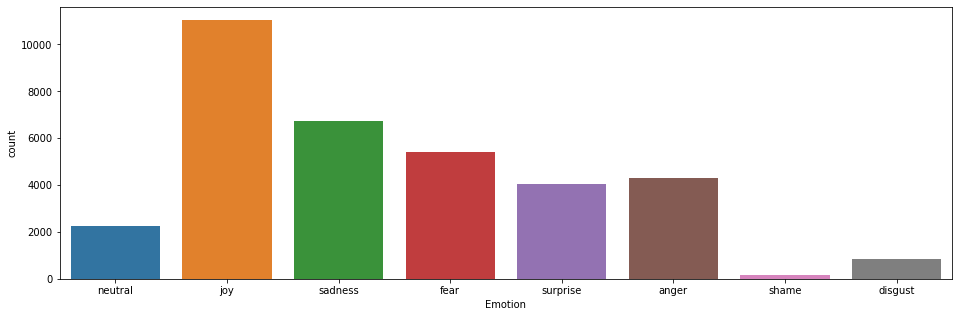

In [85]:
plt.figure(figsize=(16,5))
viz1=sns.countplot(x=df['Emotion'])

In [86]:
# Dependent and Independent Variables
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']


In [87]:
X_train,X_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [88]:
from sklearn.pipeline import Pipeline

In [89]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [90]:
#Train and fit data
pipe_lr.fit(X_train,y_train)

/home/anirban/.virtualenvs/DS_Work_Env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [91]:
pipe_lr.score(X_test,y_test)

0.6218624257520597

In [135]:
#example
ex=''


In [136]:
pipe_lr.predict([ex])


array(['joy'], dtype=object)

In [133]:
pipe_lr.predict_proba([ex])


array([[1.55478740e-02, 6.26251399e-03, 1.83034440e-02, 7.56599490e-01,
        7.19834261e-03, 1.36179237e-01, 7.12737093e-04, 5.91963613e-02]])

In [134]:
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [144]:
import joblib

In [147]:
pipeline_file=open('../models/Text_Emotion_Detection_15-09-2022.pkl','wb')

In [148]:
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()